# Time Series Decomposition & Analysis Assignment

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [ ]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv')
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2820 non-null   datetime64[ns]
 1   Sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


In [ ]:
df.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


### Use a line chart to plot the time series.

In [ ]:
def iline(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none')
    fig.show()

In [ ]:
iline(df, 'Month', 'Sunspots')

In [ ]:
df[df.Month.dt.year == 1749]

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
5,1749-06-01,83.5
6,1749-07-01,94.8
7,1749-08-01,66.3
8,1749-09-01,75.9
9,1749-10-01,75.5


### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [ ]:

#Ideally, I would use an interactive method here and compare the residuals against the frequency to get the best frequency for the set. If possible. Eleven years seems decent enough. 
series = df.set_index('Month')
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=132)
trend = decomposition.trend
ss = df.copy()

In [ ]:
trend = trend[trend['Sunspots'].isna() == False].reset_index()
seasonality = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

In [ ]:
ss['trend'] = trend['Sunspots']

In [ ]:
ss['seasonality'] = seasonality.Sunspots
ss['residuals'] = residuals.Sunspots

### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [ ]:
melted = pd.melt(ss, 
                 id_vars='Month', 
                 value_vars=['Sunspots', 'trend', 'seasonality', 'residuals'], 
                 var_name='Variable', 
                 value_name='Value')

melted.head()

,Month,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [ ]:
iline(melted, 'Month', 'Value', groups='Variable', title='Observed vs Components')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [ ]:
ss['RollingMean'] = ss['Sunspots'].rolling(window=132).mean()
ss['RolldingDeviation'] = ss["Sunspots"].rolling(window=132).std()

In [ ]:
ss.describe()

,Sunspots,trend,seasonality,residuals,RollingMean,RolldingDeviation
count,2820.000000,2688.000000,2820.000000,2688.000000,2689.000000,2689.000000
mean,51.265957,50.176149,0.354366,-0.392021,50.179639,36.627596
std,43.448971,18.380175,20.074631,33.600060,18.381592,12.744972
min,0.000000,14.282197,-28.228307,-96.897324,14.188636,14.769722
25%,15.700000,35.977178,-19.961658,-22.126240,36.002273,26.808670
50%,42.000000,49.503788,-1.584570,-2.570875,49.547727,35.607721
75%,74.925000,62.260417,18.481169,15.883792,62.252273,45.059031
max,253.800000,95.677273,37.747968,197.857672,95.780303,71.900152


### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [ ]:
melted = pd.melt(ss, 
                 id_vars='Month', 
                 value_vars=['Sunspots', 'RollingMean', 'RolldingDeviation'], 
                 var_name='Variable', 
                 value_name='Value')

melted.head()

,Month,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [ ]:
iline(melted, 'Month', 'Value', groups='Variable')

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [ ]:
adf_test = sm.tsa.stattools.adfuller(ss['Sunspots'])

adf_test

(-9.567667511913076,
 2.333452143866306e-16,
 27,
 2792,
 {'1%': -3.432694313168895,
  '10%': -2.5673213632123297,
  '5%': -2.862575752726396},
 23141.276837258665)

In [ ]:
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
results

ADF Test Statistic    -9.567668e+00
P-Value                2.333452e-16
# Lags Used            2.700000e+01
# Observations Used    2.792000e+03
dtype: float64

In [ ]:
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

In [ ]:
print(results)

ADF Test Statistic    -9.567668e+00
P-Value                2.333452e-16
# Lags Used            2.700000e+01
# Observations Used    2.792000e+03
Critical Value 1%     -3.432694e+00
Critical Value 5%     -2.862576e+00
Critical Value 10%    -2.567321e+00
dtype: float64


### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

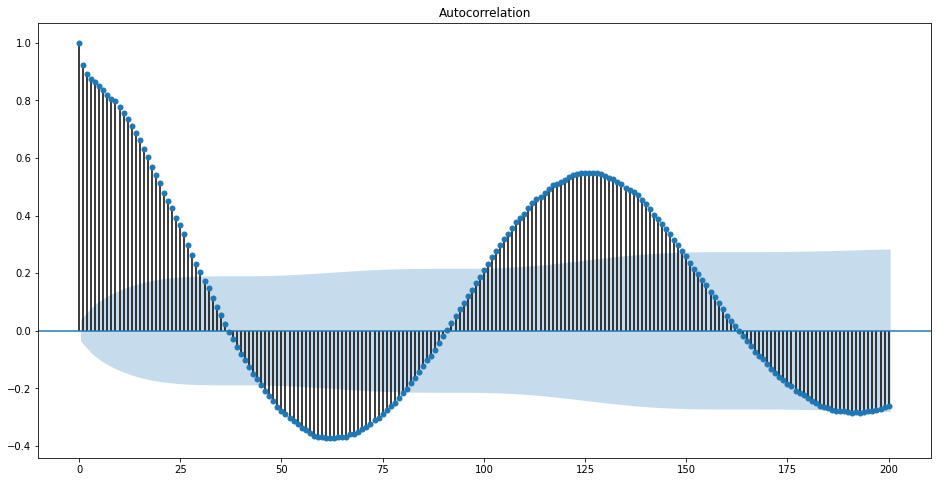

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

series = df.set_index('Month')
fig = plot_acf(series, lags=200)